<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# TimML Notebook 0
## Single layer flow
*Developed by Mark Bakker*

In this Notebook, a very basic TimML model is built for a system consisting of one layer with uniform flow, a well, and a river.

Consider uniform flow from East to West. The gradient is 0.001. The hydraulic conductivity is $k=10$ m/d. The aquifer bottom and top are at 0 m and 10 m. The head at $x=-1000$ m and $y=0$ is fixed at 41 m. We start by importing `timml` and `pylab` and tell the plotting package `matplotlib` to put all the figures in the notebook.

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

Create a model and specify the hydraulic conductivity `k`, elevation  of the bottom of the aquifer `zb`, and elevation of the top of the aquifer `zt`. Note that the model is stored in the variable `ml`, which is used in the remainder of this notebook to refer to the model. 

In [2]:
ml = Model(k=[10], zb=[0], zt=[10])

Fix the head to 41 m at $(x,y)=(-1000, 0)$

In [3]:
rf = Constant(ml, xr=-1000, yr=0, head=41)

Add the uniform flow. The gradient `grad` represents the head drop over the distance in the direction of flow. The direction is specified with by the `angle` (in degrees), which is zero for straight East and is positive when going counter clockwise.

In [4]:
uf = Uflow(ml, grad=0.001, angle=0)

Now that the model and elements are specified, the model can be solved.

In [5]:
ml.solve()

Starting solve
Number of elements:  2
Percent progress:  0  
size of matrix (1, 1)
Solution complete


A contour plot is created for an area where $x$ goes from -1000 to 100, and $y$ goes from -500 to +500. The head is computed on a grid of 50 equally spaced points in both the $x$ and $y$ direction, the levels of the contours are specified and labels are drawn. The `size` of the plot is specified as 6 by 6 inches, which is a bit larger than de default size. 

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


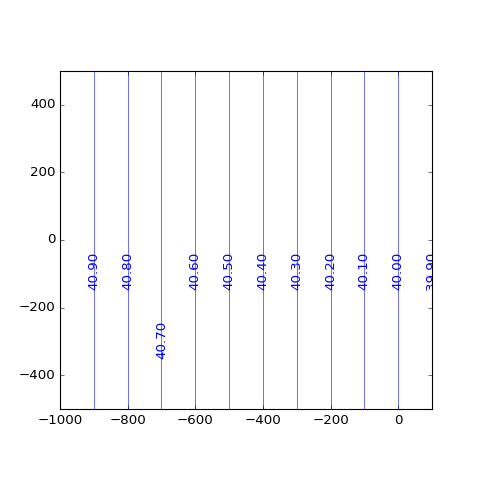

done with contouring


In [6]:
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))

## Adding a well
A well is located at $(x,y)=(-400,0)$ with a discharge $Q=50$ m$^3$ and a radius of 0.2 m.

In [7]:
w = Well(ml, xw=-400, yw=0, Qw=50, rw=0.2)

After the well is added (or any other elements), the model needs to be solved again. A contour plot is created and a 10 strace line are added. The stepsize is given in meters and represents that largest space step that is taken, but it is reduced when certain accuracy constraints are not met. Note that, after running the code cell below, for each trace line it is printed to the screen what the reason was that the traceline was aborted. In this case it was either because the trace line reached a well or reached the maximum number of steps (the default is 200 steps, but this can be changed by specifying the `Nmax` keyword).  

Starting solve
Number of elements:  3
Percent progress:  0  
size of matrix (1, 1)
Solution complete
grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


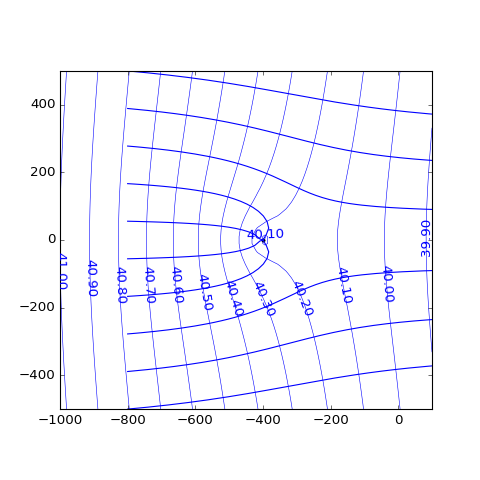

done with contouring
reached maximum number of steps
reached maximum number of steps
reached maximum number of steps
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached maximum number of steps
reached maximum number of steps
reached maximum number of steps


In [8]:
ml.solve()
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
timtracelines(ml, xlist=10 * [-800], ylist=linspace(-500, 500, 10), zlist=10*[0], step=20)

## Adding a river
A river runs along $x=0$. The water level in the river is 40 m. The river is simulated with 20 line-sinks from $y=-800$ to $y=800$. A new model is started and all elements are added. The well draws water from the river. Trace lines are started upstream of the well (blue) and next to the river (red). 

Starting solve
Number of elements:  23
Percent progress:  0 10 20 30 40 50 60 70 80 90 100  
size of matrix (21, 21)
Solution complete
grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


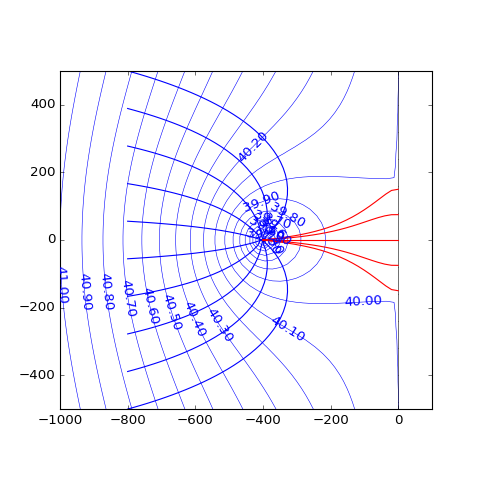

done with contouring
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well


//anaconda/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well


In [9]:
ml = Model(k=[10], zb=[0], zt=[10])
rf = Constant(ml, xr=-1000, yr=0, head=41)
uf = Uflow(ml, grad=0.001, angle=0)
w = Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
yls = linspace(-800, 800, 21)
for i in range(20):
    HeadLineSink(ml, 0, yls[i], 0, yls[i+1], 40)
ml.solve()
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
timtracelines(ml, xlist=10 * [-800], ylist=linspace(-500, 500, 10), zlist=10*[0], step=20)
timtracelines(ml, xlist=5 * [-0.01], ylist=linspace(-150, 150, 5), zlist=5*[0], step=20, color='r')

### Capture zone
A 5-year capture zone is created with the `capturezone` command. Note that the `capturezone` command only works after a contour plot is created first.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


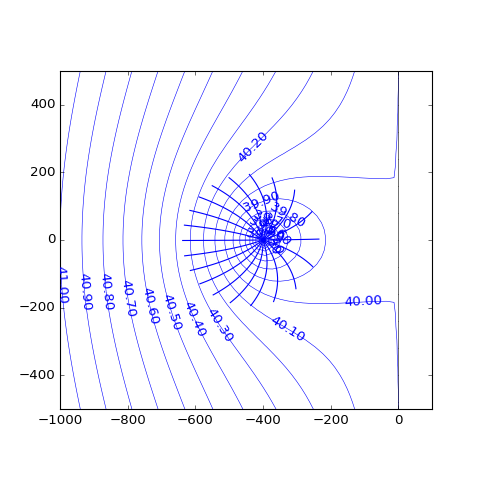

done with contouring
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax


In [10]:
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
capturezone(ml, w=w, N=20, z=0, tmax=5 * 365.25)